In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install tensorflow tensorflow.gpu opencv-python matplotlib

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [3]:

import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as implt
import seaborn as sns
sns.set_style("whitegrid")

In [10]:
train_path = '/kaggle/input/horses-or-humans-dataset/horse-or-human/train'
val_path = '/kaggle/input/horses-or-humans-dataset/horse-or-human/validation'

In [13]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values to between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# One-hot encode labels
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

# Load VGG19 pretrained on ImageNet
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add custom classification layers on top
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the pretrained model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, batch_size=64, epochs=10, validation_split=0.15)

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

80134624/80134624 [==============================] - 0s 0us/step


Epoch 1/10
665/665 [==============================] - 507s 761ms/step - loss: 1.5832 - accuracy: 0.4416 - val_loss: 1.3326 - val_accuracy: 0.5273
Epoch 2/10
665/665 [==============================] - 492s 739ms/step - loss: 1.3857 - accuracy: 0.5110 - val_loss: 1.2661 - val_accuracy: 0.5509
Epoch 3/10
665/665 [==============================] - 482s 725ms/step - loss: 1.3189 - accuracy: 0.5365 - val_loss: 1.2357 - val_accuracy: 0.5629
Epoch 4/10
665/665 [==============================] - 482s 725ms/step - loss: 1.2863 - accuracy: 0.5477 - val_loss: 1.2114 - val_accuracy: 0.5625
Epoch 5/10
665/665 [==============================] - 493s 742ms/step - loss: 1.2544 - accuracy: 0.5596 - val_loss: 1.1921 - val_accuracy: 0.5760
Epoch 6/10
665/665 [==============================] - 482s 725ms/step - loss: 1.2361 - accuracy: 0.5662 - val_loss: 1.2093 - val_accuracy: 0.5717
Epoch 7/10
665/665 [==============================] - 492s 740ms/step - loss: 1.2128 - accuracy: 0.5730 - val_loss: 1.1806 -

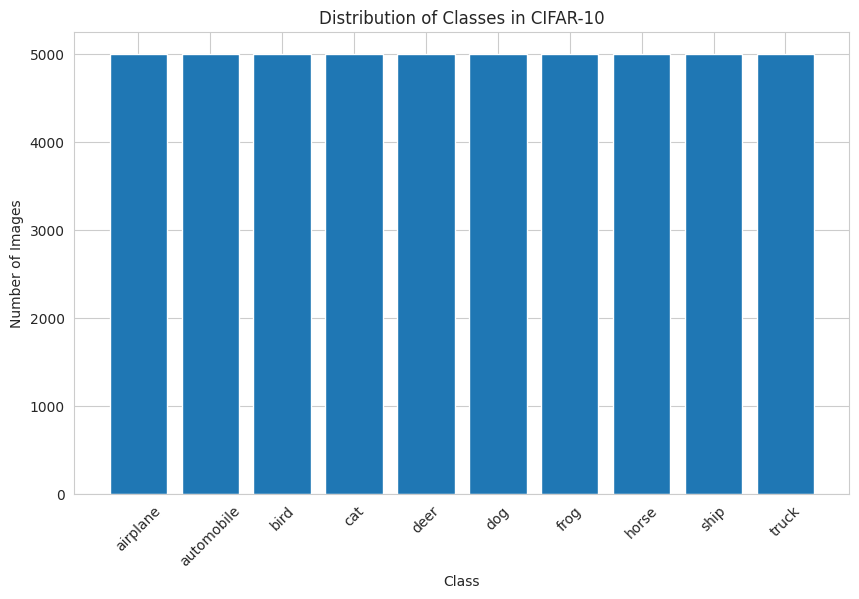

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(train_images, train_labels), (_, _) = cifar10.load_data()

# Define class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Calculate the number of images per class
num_images_per_class = [np.sum(train_labels == i) for i in range(10)]

# Plot a bar chart to visualize the distribution of classes
plt.figure(figsize=(10, 6))
plt.bar(class_names, num_images_per_class)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Distribution of Classes in CIFAR-10')
plt.xticks(rotation=45)
plt.show()